In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.1/Redes Neurais Artificiais/RNA/')

Mounted at /content/drive


In [20]:
from models import utils, metrics, plots
from models.classifiers.DMCClassifier import * 
from models.classifiers.KNeighborsClassifier import *

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [3]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)

In [4]:
df_iris.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


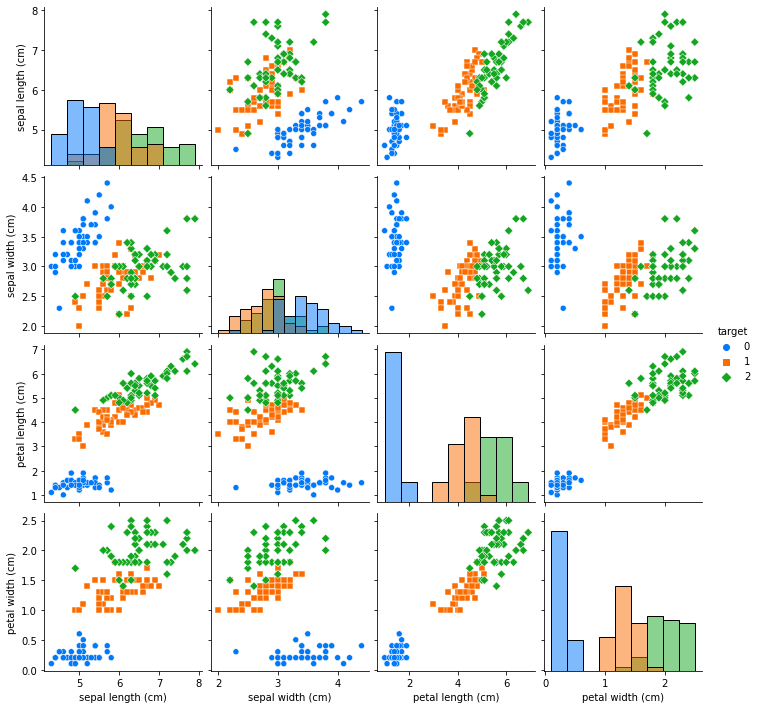

In [30]:
sns.pairplot(df_iris,hue='target', diag_kind="hist", palette={0: '#0079fa', 1: '#fa6c00', 2: '#14a620'},markers=["o", "s", "D"])

In [5]:
df_iris['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [6]:
dict_df = utils.target_one_vs_all(df_iris, col_name_target='target') # Pegando dataframes por classe, exemplo: setosa vs outras

df_iris_setosa = dict_df[0] # setosa o target é 0
df_iris_versicolor = dict_df[1] # setosa o target é 1
df_iris_virginica = dict_df[2] # setosa o target é 2

# Setosa vs outras

In [7]:
X_train, y_train, X_test, y_test = utils.split_train_test(df_iris_setosa, 'target', train_size=0.8, stratify=True)

print(f'Tamanho treino: {len(X_train)}\nTamanho teste: {len(X_test)}')

knn_setosa = KNeighborsClassifier()
dmc_setosa = DMCClassifier()

knn_setosa.fit(X_train.copy(), y_train)
dmc_setosa.fit(X_train.copy(), y_train)

y_pred_knn = knn_setosa.predict(X_test.copy())
y_pred_dmc = dmc_setosa.predict(X_test.copy())

print('Taxa de acerto KNN: ', metrics.taxa_acerto(y_test, y_pred_knn))

print('Taxa de acerto DMC: ', metrics.taxa_acerto(y_test, y_pred_dmc))

Tamanho treino: 120
Tamanho teste: 30
Taxa de acerto KNN:  1.0
Taxa de acerto DMC:  0.9666666666666667


# Versicolor vs outras

In [8]:
X_train, y_train, X_test, y_test = utils.split_train_test(df_iris_versicolor, 'target', train_size=0.8, stratify=True)

print(f'Tamanho treino: {len(X_train)}\nTamanho teste: {len(X_test)}')

knn_versicolor = KNeighborsClassifier()
dmc_versicolor = DMCClassifier()

knn_versicolor.fit(X_train.copy(), y_train)
dmc_versicolor.fit(X_train.copy(), y_train)

y_pred_knn = knn_versicolor.predict(X_test.copy())
y_pred_dmc = dmc_versicolor.predict(X_test.copy())

print('Taxa de acerto KNN: ', metrics.taxa_acerto(y_test, y_pred_knn))

print('Taxa de acerto DMC: ', metrics.taxa_acerto(y_test, y_pred_dmc))

Tamanho treino: 120
Tamanho teste: 30
Taxa de acerto KNN:  0.9666666666666667
Taxa de acerto DMC:  0.6333333333333333


# Virginica vs outras

In [9]:
X_train, y_train, X_test, y_test = utils.split_train_test(df_iris_virginica, 'target', train_size=0.8, stratify=True)

print(f'Tamanho treino: {len(X_train)}\nTamanho teste: {len(X_test)}')

knn_virginica = KNeighborsClassifier()
dmc_virginica = DMCClassifier()

knn_virginica.fit(X_train.copy(), y_train)
dmc_virginica.fit(X_train.copy(), y_train)

y_pred_knn = knn_virginica.predict(X_test.copy())
y_pred_dmc = dmc_virginica.predict(X_test.copy())

print('Taxa de acerto KNN: ', metrics.taxa_acerto(y_test, y_pred_knn))

print('Taxa de acerto DMC: ', metrics.taxa_acerto(y_test, y_pred_dmc))

Tamanho treino: 120
Tamanho teste: 30
Taxa de acerto KNN:  1.0
Taxa de acerto DMC:  0.8333333333333334


# Todas as flores

Multiclass

Tamanho treino: 120
Tamanho teste: 30

Taxa de acerto KNN:  1.0
Taxa de acerto DMC:  0.9333333333333333 





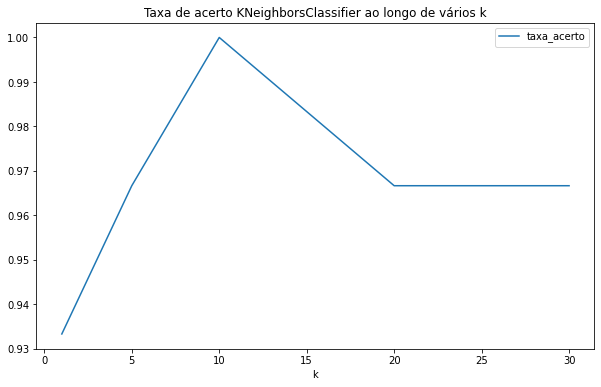

In [17]:
X_train, y_train, X_test, y_test = utils.split_train_test(df_iris, 'target', train_size=0.8, stratify=True)

print(f'Tamanho treino: {len(X_train)}\nTamanho teste: {len(X_test)}\n')

list_metricas, list_k = [], [1, 5, 10, 20, 30]

for k in list_k:

    knn_all = KNeighborsClassifier(n_neighbors = k)
    knn_all.fit(X_train.copy(), y_train)
    y_pred_knn = knn_all.predict(X_test.copy())
    list_metricas.append(metrics.taxa_acerto(y_test, y_pred_knn))

df_metrics = pd.DataFrame(list(zip(list_k, list_metricas)), columns=['k', 'taxa_acerto'])
df_metrics.plot.line(x = 'k', y = 'taxa_acerto', title='Taxa de acerto KNeighborsClassifier ao longo de vários k', figsize=(10,6))
best_k = df_metrics.sort_values(by=['taxa_acerto'], ascending=False).iloc[0,0]

knn_all = KNeighborsClassifier(n_neighbors=best_k)
dmc_all = DMCClassifier()

knn_all.fit(X_train.copy(), y_train)
dmc_all.fit(X_train.copy(), y_train)

y_pred_knn = knn_all.predict(X_test.copy())
y_pred_dmc = dmc_all.predict(X_test.copy())

print('Taxa de acerto KNN: ', metrics.taxa_acerto(y_test, y_pred_knn))

print('Taxa de acerto DMC: ', metrics.taxa_acerto(y_test, y_pred_dmc), '\n\n\n')

# Criando dataframe artificial

Como solicitado no trabalho, será criado um dataframe artificial desbalanceado

In [11]:
conjunto_1 = utils.make_coords(coord_limit_x = (-2, 2), 
                               coord_limit_y = (4, 8),
                               target= 0,
                               len_set = 10) # Top left

conjunto_2 = utils.make_coords(coord_limit_x = (-2, 2), 
                               coord_limit_y = (-2, 2),
                               target= 0,
                               len_set = 10) # Botton left

conjunto_3 = utils.make_coords(coord_limit_x = (4, 8), 
                               coord_limit_y = (-2, 2),
                               target= 0,
                               len_set = 10) # Bottom right

conjunto_4 = utils.make_coords(coord_limit_x = (4, 8), 
                               coord_limit_y = (4, 8),
                               target= 1,
                               len_set = 10) # Top right

df_artificial_1 = pd.DataFrame(data= conjunto_1 + conjunto_2 + conjunto_3 + conjunto_4, columns=['x', 'y', 'target'])

In [12]:
df_artificial_1.head(3)

,x,y,target
0,-0.967406,7.973550,0
1,1.658107,5.613074,0
2,-0.189602,7.374871,0


In [13]:
df_artificial_1['target'].value_counts()

0    30
1    10
Name: target, dtype: int64

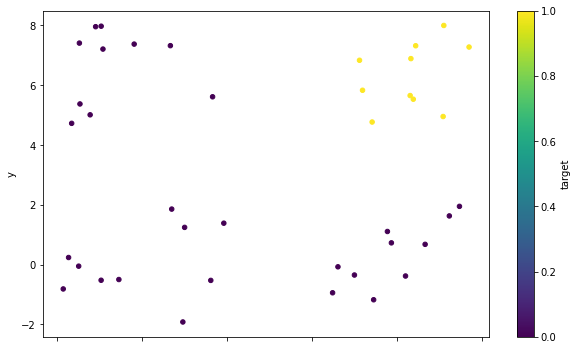

In [14]:
df_artificial_1.plot.scatter( x='x', y='y', c='target', colormap='viridis', figsize=(10,6))

In [15]:
X_train, y_train, X_test, y_test = utils.split_train_test(df_artificial_1, 'target', train_size=0.8, stratify=True)

print(f'Tamanho treino: {len(X_train)}\nTamanho teste: {len(X_test)}')

knn_artificial = KNeighborsClassifier()
dmc_artificial = DMCClassifier()

knn_artificial.fit(X_train.copy(), y_train)
dmc_artificial.fit(X_train.copy(), y_train)

y_pred_knn = knn_artificial.predict(X_test.copy())
y_pred_dmc = dmc_artificial.predict(X_test.copy())

print('Taxa de acerto KNN: ', metrics.taxa_acerto(y_test, y_pred_knn))

print('Taxa de acerto DMC: ', metrics.taxa_acerto(y_test, y_pred_dmc))

Tamanho treino: 32
Tamanho teste: 8
Taxa de acerto KNN:  1.0
Taxa de acerto DMC:  0.875


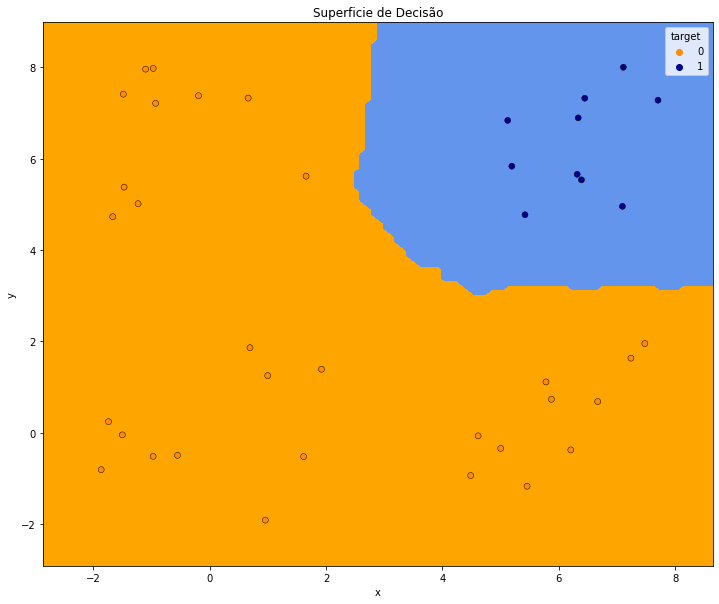

In [16]:
plots.plot_decision_boundary(
    
    df_artificial_1,
    list_features = ['x', 'y'],
    col_target='target',
    model = knn_artificial,
    h=.1
)